In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  '#373e4b',
    "axes.facecolor": '#373e4b',
})

Dimension de X: (100, 2)
Dimension de y: (100, 1)


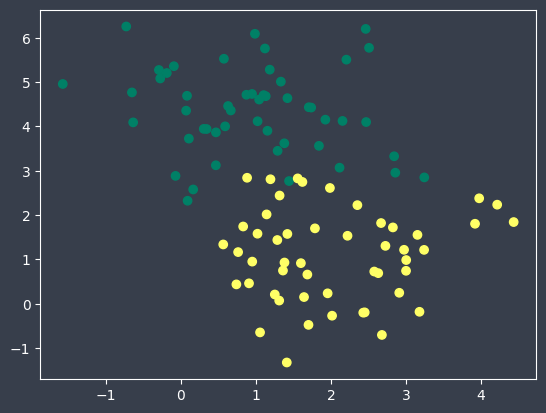

In [34]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y=y.reshape((y.shape[0], 1))

print("Dimension de X:", X.shape)
print("Dimension de y:", y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap="summer")
plt.show()

In [35]:
def initialisation(X):
    W=np.random.randn(X.shape[1],1)
    b=np.random.randn(1)
    return (W,b)

In [36]:
def model(X,W,b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [37]:
def log_loss(A,y):
    return 1/len(y)*np.sum(-y*np.log(A)-(1-y)*np.log(1-A))

In [38]:
def gradients(A,X,y):
    dW=1/len(y)*np.dot(X.T, A-y)
    db=1/len(y)*np.sum(A-y)
    return (dW,db)

In [39]:
def update(dW,db,W,b,learning_rate):
    W=W-learning_rate*dW
    b=b-learning_rate*db
    return(W,b)

In [40]:
def predict(X,W,b):
    A=model(X,W,b)
    #print(A)
    return A>=0.5

In [41]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss, label='train loss')
    plt.legend()
    plt.show()

    return (W, b)

0.89


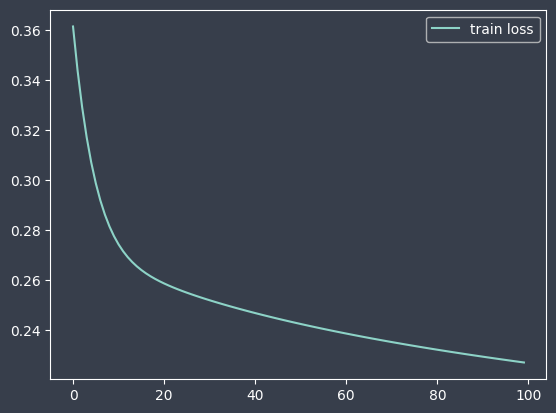

In [42]:
W,b=artificial_neuron(X,y)

In [43]:
W,b

(array([[ 1.36106006],
        [-1.13860589]]),
 array([0.56920558]))

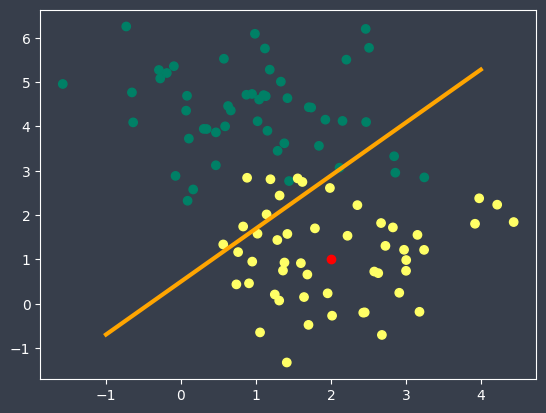

array([ True])

In [44]:
new_plant=np.array([2,1])

x0=np.linspace(-1,4,100)
x1=(-W[0]*x0-b)/W[1]

plt.scatter(X[:,0], X[:,1], c=y, cmap="summer")
plt.scatter(new_plant[0], new_plant[1], c='red')
plt.plot(x0, x1, c='orange', lw=3)
plt.show()
predict(new_plant,W,b)